In [1]:
#data format library
import h5py
#numpy
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import sys
sys.path.append('./utils')
import operator_calculations as op_calc
import worm_dynamics as worm_dyn
import stats

In [2]:
f = h5py.File('../data/markovianity/coarse_tscales_0.h5','r')
delay_range = np.array(f['delay_range'],dtype=int)
f.close()
dt=1/16.
n_worms=12
n_shuffle=100
ts_traj_shuffle = np.zeros((n_worms,len(delay_range),n_shuffle))
ts_traj_w = np.zeros((n_worms,len(delay_range)))
for kw in range(n_worms):
    f = h5py.File('../data/markovianity/coarse_tscales_{}.h5'.format(kw),'r')
    ts_traj_shuffle[kw] = np.array(f['ts_traj_shuffle'])
    ts_traj_w[kw] = np.array(f['timp'])
    f.close()

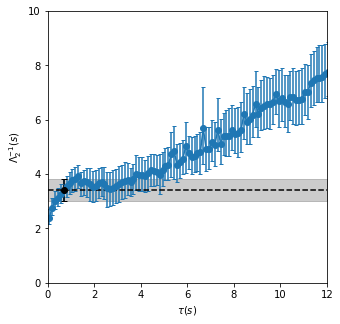

In [4]:
plt.figure(figsize=(5,5))
mean,cil,ciu = stats.bootstrap(ts_traj_w,n_times=100)
plt.errorbar(delay_range*dt,mean,yerr = [mean-cil,ciu-mean],marker='o',capsize=2)
plt.errorbar(delay_range[5]*dt,mean[5],yerr = [[mean[5]-cil[5]],[ciu[5]-mean[5]]],marker='o',capsize=3,c='k')
plt.axhline(mean[5],c='k',ls='--')
xmax=12
plt.fill_between(np.arange(0,xmax+1),np.ones(xmax+1)*cil[5],np.ones(xmax+1)*ciu[5],color='k',alpha=.2)
plt.xlim(0,xmax)
plt.ylim(0,10)
plt.xlabel(r'$\tau (s)$')
plt.ylabel(r'$\Lambda_2^{-1}(s)$')
# plt.savefig('coarse_tscales_Foraging_{}_clusters.pdf'.format(n_clusters))
plt.show()

In [5]:
f = h5py.File('../data/markovianity/coarse_eigvals_0.h5','r')
delay_range = np.array(f['delay_range'],dtype=int)
f.close()
dt=1/16.
n_worms=12
n_shuffle=100
eigvals_traj_shuffle = np.zeros((n_worms,len(delay_range),n_shuffle))
eigvals_traj_w = np.zeros((n_worms,len(delay_range)))
for kw in range(n_worms):
    f = h5py.File('../data/markovianity/coarse_eigvals_{}.h5'.format(kw),'r')
    eigvals_traj_shuffle[kw] = np.array(f['eigvals_traj_shuffle'])
    eigvals_traj_w[kw] = np.array(f['eigs'])
    f.close()

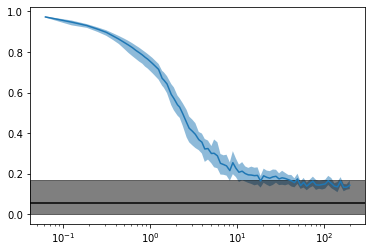

In [6]:
mean,cil,ciu = stats.bootstrap(eigvals_traj_w,n_times=100)
plt.plot(delay_range*dt,mean)
plt.fill_between(delay_range*dt,cil,ciu,alpha=.5)
mean,cil,ciu = np.concatenate(eigvals_traj_shuffle,axis=1).mean(axis=1),np.percentile(np.concatenate(eigvals_traj_shuffle,axis=1),2.5,axis=1),np.percentile(np.concatenate(eigvals_traj_shuffle,axis=1),97.5,axis=1)
plt.axhline(mean[0],c='k')
plt.axhspan(cil[0],ciu[0],color='k',alpha=.5)
plt.xscale('log')
plt.show()

In [7]:
kd=11
delay=delay_range[kd]
krange = np.arange(1,100)
eigvals_pred = np.vstack([np.hstack(stats.bootstrap(eigvals_traj_w[:,kd]**k,n_times=100)) for k in krange])

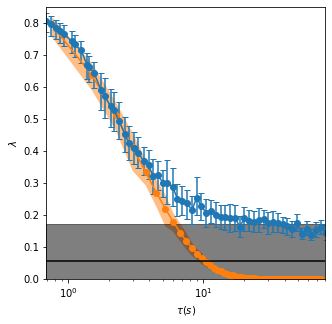

In [8]:
plt.figure(figsize=(5,5))
mean,cil,ciu = stats.bootstrap(eigvals_traj_w,n_times=100)
plt.errorbar(delay_range*dt,mean,yerr = [mean-cil,ciu-mean],marker='o',capsize=3,fmt='o-')
plt.fill_between(delay_range*dt,cil,ciu,alpha=0)
plt.plot(krange*delay*dt,eigvals_pred[:,0],marker='o')
plt.fill_between(krange*delay*dt,eigvals_pred[:,1],eigvals_pred[:,2],alpha=.5)
mean,cil,ciu = np.concatenate(eigvals_traj_shuffle,axis=1).mean(axis=1),np.percentile(np.concatenate(eigvals_traj_shuffle,axis=1),2.5,axis=1),np.percentile(np.concatenate(eigvals_traj_shuffle,axis=1),97.5,axis=1)
plt.axhline(mean[0],c='k')
plt.axhspan(cil[0],ciu[0],color='k',alpha=.5)
plt.xlim(delay*dt-dt,80)
plt.xscale('log')
plt.ylim(0,0.85)
plt.xlabel(r'$\tau (s)$')
plt.ylabel(r'$\lambda $')
# plt.savefig('prediction_coarse_Markov.pdf')
plt.show()